In [40]:
import sys
import pandas as pd 
import numpy as np 
import sklearn
import xgboost
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline
print(sys.version)
print(np.version.version)
print(sklearn.__version__)
print(xgboost.__version__)

3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
1.13.3
0.19.1
0.6


In [41]:
from sklearn.datasets import load_boston
boston = load_boston()

In [42]:
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [43]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [44]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [45]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Features Details 
###### CRIM -- per capita crime rate by town
###### ZN --  proportion of residential land zoned for lots over 25,000 sq.ft.
###### INDUS -- proportion of non-retail business acres per town
###### CHAS -- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
###### NOX -- nitric oxides concentration (parts per 10 million)
###### RM -- average number of rooms per dwelling
###### AGE -- proportion of owner-occupied units built prior to 1940
###### DIS -- weighted distances to five Boston employment centres
###### RAD -- index of accessibility to radial highways
###### TAX --  full-value property-tax rate per (dollar 10,000)
###### PTRATIO --  pupil-teacher ratio by town
###### B -- 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
###### LSTAT -- % lower status of the population

In [46]:
df_x=pd.DataFrame(boston.data,columns=boston.feature_names)

In [47]:
df_y=pd.DataFrame(boston.target)
print(df_y.head(10))

      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2
5  28.7
6  22.9
7  27.1
8  16.5
9  18.9


In [48]:
print(df_x.count())
print(df_y.count())
print(df_x.columns)

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
dtype: int64
0    506
dtype: int64
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [49]:
print(df_x.shape)
print(df_y.shape)

(506, 13)
(506, 1)


In [50]:
df_x.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [51]:
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Handling missing data

In [52]:
print(df_x.isnull().sum().sort_values(ascending=False))
print(df_y.isnull().sum().sort_values(ascending=False))

LSTAT      0
B          0
PTRATIO    0
TAX        0
RAD        0
DIS        0
AGE        0
RM         0
NOX        0
CHAS       0
INDUS      0
ZN         0
CRIM       0
dtype: int64
0    0
dtype: int64


# Linear Regression Model

In [53]:
reg = linear_model.LinearRegression()

In [54]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [55]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
coef = np.array(reg.coef_)
print(coef)

[[ -1.14743504e-01   4.70875035e-02   8.70282354e-03   3.23818824e+00
   -1.67240567e+01   3.87662996e+00  -1.08218769e-02  -1.54144627e+00
    2.92604151e-01  -1.33989537e-02  -9.07306805e-01   8.91271054e-03
   -4.58747039e-01]]


### From the above Cofficent Values we can conclude that
##### ZN contributing 4.7% in Predicting the Price Feature
##### INDUS contributing 8.7% in Predicting the Price Feature
##### CHAS contributing 3.2% in Predicting the Price Feature
##### Rm contributing 3.8% in Predicting the Price Feature
##### RAD contributing 2.9% in Predicting the Price Feature
##### B contributing 8.9% in Predicting the Price Feature

#### Rest other features are not contributing in predicting the target_Fearture(Price), rather they are negatively effecting the predictions as concluded from above coefficient values

### Feature/Column Contribution to the model in ASCENDING ORDER..
##### Feature/Column B is contributing maximum with 8.9% to the model, after that
##### INDUS feature is Contributing with 8.7% to the model. 
##### ZN feature is Contributing with 4.7% to the model. 
##### RM feature is Contributing with 3.8% to the model.
##### CHAS feature is Contributing with 3.2% to the model. 
##### RAD feature is Contributing with 2.9% to the model. 

In [57]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [58]:
y_pred = reg.predict(x_test)
y_pred

array([[ 12.06508881],
       [ 26.98544801],
       [ 17.59242607],
       [ 18.15842166],
       [ 36.91656975],
       [ 25.43573299],
       [ 31.08610267],
       [ 19.7198111 ],
       [ 19.63707329],
       [ 22.95805783],
       [ 28.38566642],
       [ 28.49200286],
       [ 19.00260488],
       [ 32.42578552],
       [ 21.52409329],
       [ 15.20850151],
       [ 21.23763462],
       [ 11.60093062],
       [ 11.38018796],
       [ 13.62527521],
       [  5.65831897],
       [ 17.34095216],
       [ 20.81305124],
       [ 22.51181212],
       [ 16.39301984],
       [ 20.32279223],
       [ 17.89495414],
       [ 14.23685883],
       [ 21.08606151],
       [ 17.50432715],
       [ 14.50006271],
       [ 23.63998403],
       [ 34.31768468],
       [ 22.23613308],
       [ 16.82042372],
       [ 20.15196012],
       [ 30.67786122],
       [ 35.60991076],
       [ 23.50419347],
       [ 24.67227487],
       [ 36.91121083],
       [ 32.34217047],
       [ 19.10793629],
       [ 32

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

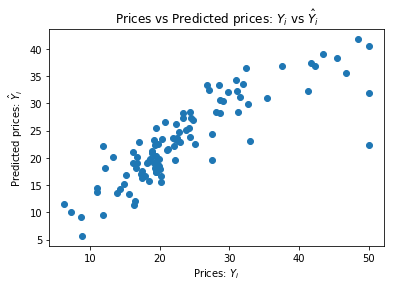

In [59]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

#### From the above plot on high level we can conclude its almost linear case, but not 100%.

## LinearRegression Mean Absolute Error

In [60]:
np.mean((reg.predict(x_test) - y_test)**2)
print("Mean Absolute Error : " + str(mean_absolute_error(y_pred, y_test)))

Mean Absolute Error : 3.36633081852


#### 3.3 is the average magnitude of the errors in a set of predictions, without considering their direction

## LinearRegression Mean Square Error

In [61]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse)

25.4079767171


#### 25.4 is quadratic scoring that also measures the average magnitude of the error which is root Mean Square Error

In [62]:
#print(y_pos.shape)
print(df_x.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


## LinearRegression Model Evaluation using R² value

In [63]:
reg.score(x_test,y_test)

0.72647013796829818

##### R² Value is 72.6%, meaning, only 72% of variance in Target_feature(Price) is explained by  all the 13 different Input_features in datset.

#### For now we have input all the 13 features, but we can also increase much more model accuracy by simply input only those features which are having maximum Coefficient values and removing all those features, which are not very much contributing to the model and all the negative coefficient features aswell.

# XGBoost Model

In [64]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error#mean square error 
my_model = XGBRegressor()

In [65]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.1)
my_model.fit(x_train, y_train, early_stopping_rounds=26, 
             eval_set=[(x_test, y_test)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [66]:
# make predictions
predictions = my_model.predict(x_test)

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

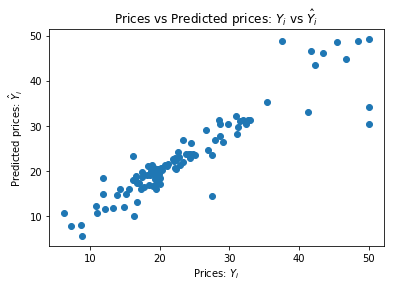

In [67]:
plt.scatter(y_test, predictions)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

#### From the above graph we can conclude its better than the Linear regression prediction graph which has been shown above. Its showing Linear charactersticts only, but at Price > 40 again become non-linear.

## XgBoost Model Mean Absolute Error

In [68]:
np.mean((reg.predict(x_test) - y_test)**2)
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 2.21446558073


#### 2.21 is the average magnitude of the errors in a set of predictions, without considering their direction

## XgBoost Model Mean Square Error

In [69]:
#import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, predictions)
print(mse)

14.0603949866


#### 14 is quadratic scoring that also measures the average magnitude of the error which is root Mean Square Error

## XgBoost Model Evaluation using R² value

In [70]:
my_model.score(x_test,y_test)

0.84863265801809074

##### R² is 84.8%, meaning, only 84% of variance in Target_feature(Price) is explained by  all the 13 different Input_features in datset.

#### For now we have input all the 13 features, but we can also increase much more model accuracy by simply input only those features which are having maximum Coefficient values and removing all those features, which are not very much contributing to the model and all the negative coefficient features aswell.